In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import src.ferbo as fb
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from src.utilities import *
import math

In [2]:
def phi_n(EC,EL, n: int,phi_list):
    # CONVERT THE FOCK SPACE STATES IN HARMONIC OSCILLATOR WAVEFUNCTIONS

    phi_ZPF=(8.0 * EC / EL) ** 0.25      
    return 1/np.sqrt(np.sqrt(np.pi)*(2**n) * 1.0* phi_ZPF * math.factorial(n)) * np.exp(-(phi_list/phi_ZPF)**2 / 2.0) * np.polyval(hermite(n), (phi_list/phi_ZPF))


def wavefunction_phi_fbq_up(EC,EL,phi_list,phi,N):
    # Wavefunction(\varphi) FOR \sigmaz = +1 OF AN EIGENSTATE OF THE Fermionic-Bosonic Qubit.

    wfunc = np.zeros(len(phi_list),dtype = complex)
    for n in range(int(N/2)+1):
        wfunc = wfunc + phi_n(EC,EL,n,phi_list)*phi.full()[2*n,0]
    return wfunc

def wavefunction_phi_fbq_down(EC,EL,phi_list,phi,N):
    # Wavefunction(\varphi) FOR \sigmaz = -1 OF AN EIGENSTATE OF THE Fermionic-Bosonic Qubit.

    wfunc = np.zeros(len(phi_list),dtype = complex)
    for n in range(int(N/2)):
        wfunc = wfunc + phi_n(EC,EL,n,phi_list)*phi.full()[2*n+1,0]
    return wfunc

In [58]:
ham = fb.hamiltonian(40, 0.05, 20, 0.01, 0)
evals, eigens = ham.eigenstates()
phi_list = np.linspace(-8*np.pi,8*np.pi,1001)
g_up = wavefunction_phi_fbq_up(40,0.05,phi_list,eigens[0],100)
g_down = wavefunction_phi_fbq_down(40,0.05,phi_list,eigens[0],100)
e_down = wavefunction_phi_fbq_down(40,0.05,phi_list,eigens[1],100)
e_up = wavefunction_phi_fbq_up(40,0.05,phi_list,eigens[1],100)


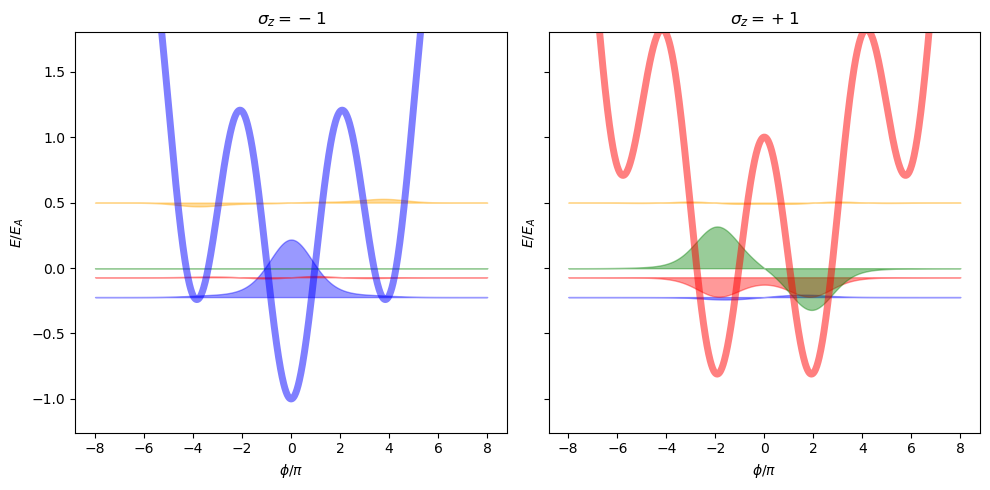

In [62]:
Ec = 30; El = 0.2; Delta = 20; r = 0.05
ham = fb.hamiltonian(Ec, El, Delta, r, 0)
evals, eigens = ham.eigenstates()
phi_list = np.linspace(-8*np.pi,8*np.pi,1001)
g_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[0],100)
g_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[0],100)
e_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[1],100)
e_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[1],100)
f_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[2],100)
f_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[2],100)
h_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[3],100)
h_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[3],100)

parameter_values = np.linspace(-0.5,0.5,101)
fixed_params = {'Ec': Ec, 'El': El, 'Delta': Delta, 'r': r}

evals_flux = fb.eigen_vs_parameter('phi_ext', parameter_values, fixed_params, eigvals=2, calculate_states=False, plot=False)


y1 = 1/2*El*phi_list**2 - Delta*np.cos(phi_list/2)
y2 = 1/2*El*phi_list**2 + Delta*np.cos(phi_list/2)

fig,ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
ax[0].set_title(r'$\sigma_z = -1$')
ax[0].plot(phi_list/np.pi,y1/Delta, color='blue', alpha=0.5,linewidth=5)
ax[0].fill_between(phi_list/np.pi,evals[0]/Delta, np.real(g_up) + np.imag(g_up) + evals[0]/Delta, color='blue', alpha=0.4)
ax[0].fill_between(phi_list/np.pi,evals[1]/Delta, np.real(e_up) + np.imag(e_up) + evals[1]/Delta, color='red', alpha=0.4)
ax[0].fill_between(phi_list/np.pi,evals[2]/Delta, np.imag(f_up) + np.imag(f_up) + evals[2]/Delta, color='green', alpha=0.4)
ax[0].fill_between(phi_list/np.pi,evals[3]/Delta, np.imag(h_up) + np.imag(h_up) + evals[3]/Delta, color='orange', alpha=0.4)

ax[1].set_title(r'$\sigma_z = +1$')
ax[1].plot(phi_list/np.pi,y2/Delta, color='red', alpha=0.5,linewidth=5)
ax[1].fill_between(phi_list/np.pi,evals[0]/Delta, np.real(g_down) + np.imag(g_down) + evals[0]/Delta, color='blue', alpha=0.4)
ax[1].fill_between(phi_list/np.pi,evals[1]/Delta, np.imag(e_down) + np.real(e_down) + evals[1]/Delta, color='red', alpha=0.4)
ax[1].fill_between(phi_list/np.pi,evals[2]/Delta, np.real(f_down) + np.imag(f_down) + evals[2]/Delta, color='green', alpha=0.4)
ax[1].fill_between(phi_list/np.pi,evals[3]/Delta, np.real(h_down) + np.imag(h_down) + evals[3]/Delta, color='orange', alpha=0.4)

# ax[2].plot(parameter_values, evals_flux[:,1]- evals_flux[:,0])

ax[0].set_xlabel(r'$\phi/\pi$')
ax[0].set_ylabel(r'$E/E_A$')
# ax[0].set_ylim(top=1.8)

ax[1].set_xlabel(r'$\phi/\pi$')
ax[1].set_ylabel(r'$E/E_A$')
ax[1].set_ylim(top=1.8)

# ax[2].set_xlabel(r'$\phi_{ext}/2\pi$')
# ax[2].set_ylabel(r'$E_{01}$ [GHz]')
# ax[2].set_ylim([0,6])

fig.tight_layout()
plt.show()

In [175]:
-Delta + eigens[0]

TypeError: Only operators can be added to a scalar.

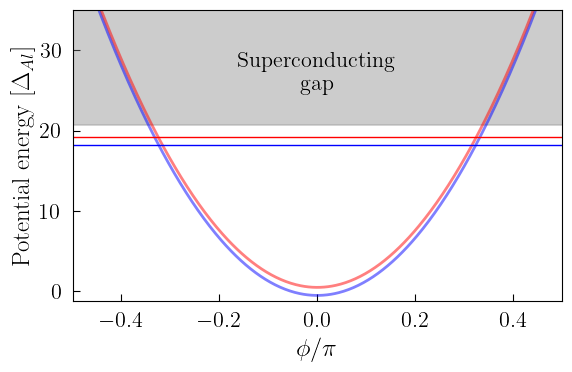

In [126]:
Ec = 194; El = 1440; Delta = 20; r = 0.0

x = np.linspace(-np.pi,np.pi,1001)
y1 = 1/2*El*x**2 - Delta*np.cos((x-0)/2)
y2 = 1/2*El*x**2 + Delta*np.cos((x-0)/2)

Delta_Al = 40

fig,ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x/np.pi, y1/Delta_Al, color='blue', alpha=0.5,linewidth=2)
ax.plot(x/np.pi, y2/Delta_Al, color='red', alpha=0.5,linewidth=2)
ax.axhline(y=(np.sqrt(8*Ec*El)/2-Delta)/Delta_Al, color='Blue', linewidth = 1)
ax.axhline(y=(np.sqrt(8*Ec*El)/2+Delta)/Delta_Al, color='Red', linewidth = 1)

ax.fill_between(x/np.pi,np.sqrt(8*Ec*El)/2/Delta_Al + 2, 35, color='gray', alpha=0.4)

ax.text(0,25,'Superconducting \n gap', ha='center')


ax.set_xlabel(r'$\phi/\pi$')
ax.set_ylabel(r'Potential energy $[\Delta_{Al}]$')
ax.set_ylim([-25/Delta,35])
ax.set_xlim([-0.5,0.5])
fig.tight_layout()
plt.show()

In [237]:
np.sqrt(8*Ec*El)/2

747.475752115077

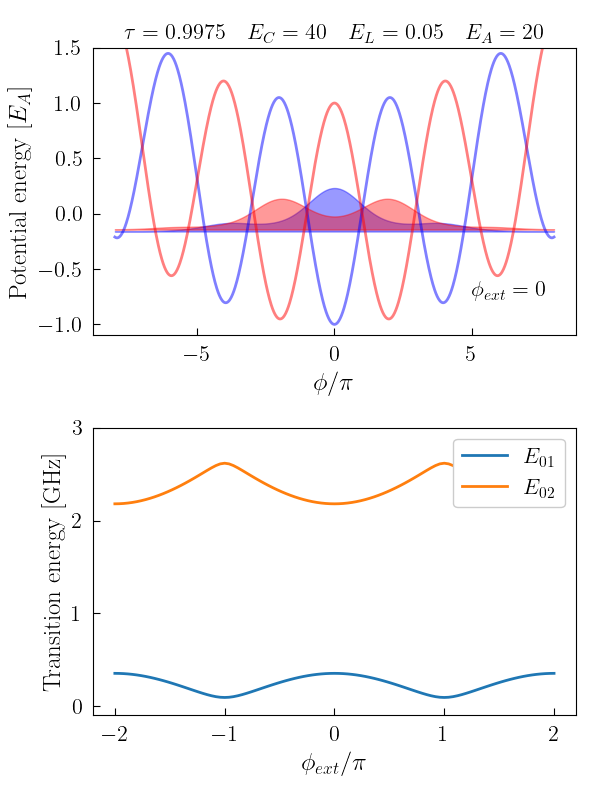

In [400]:
Ec = 40; El = 0.05; Delta = 20; r = 0.05
ham = fb.hamiltonian(Ec, El, Delta, r, 0, dimension = 100)
evals, eigens = ham.eigenstates()
phi_list = np.linspace(-8*np.pi,8*np.pi,1001)
g_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[0],100)
g_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[0],100)
e_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[1],100)
e_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[1],100)
f_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[2],100)
f_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[2],100)
h_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[3],100)
h_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[3],100)

x = np.linspace(-8*np.pi,8*np.pi,1001)

y1 = 1/2*El*x**2 - Delta*np.cos((x-0)/2)
y2 = 1/2*El*x**2 + Delta*np.cos((x-0)/2)


fig,ax = plt.subplots(2,1, figsize=(6,8))
ax[0].set_title(rf'$\tau = {round(1-r**2,4)} \quad E_C = {Ec} \quad E_L = {El} \quad E_A = {Delta}$')
ax[0].text(5,-0.75,r'$\phi_{ext}=0$')

ax[0].plot(x/np.pi, y1/Delta, color='blue', alpha=0.5,linewidth=2)
ax[0].fill_between(x/np.pi,evals[0]/Delta, np.real(g_up) + np.imag(g_up) + evals[0]/Delta, color='blue', alpha=0.4)
# ax[0].fill_between(x/np.pi,evals[0]/Delta, np.real(g_down) + np.imag(g_down) + evals[0]/Delta, color='red', alpha=0.4)

ax[0].plot(x/np.pi, y2/Delta, color='red', alpha=0.5,linewidth=2)
ax[0].fill_between(x/np.pi, evals[1]/Delta, np.abs(e_down) + np.imag(e_down) + evals[1]/Delta, color='red', alpha=0.4)
# ax[0].fill_between(x/np.pi, evals[1]/Delta, np.real(e_up) + np.imag(e_up) + evals[1]/Delta, color='blue', alpha=0.4)

ax[0].set_xlabel(r'$\phi/\pi$')
ax[0].set_ylabel(r'Potential energy $[E_A]$')
ax[0].set_ylim([-1.1,1.5])


flux_array = np.linspace(-2*np.pi, 2*np.pi, 101)
fixed_params = {'Ec': Ec, 'El': El, 'Delta': Delta, 'r': r}
eigvals = fb.eigen_vs_parameter(parameter_name='phi_ext', parameter_values=flux_array, fixed_params=fixed_params, eigvals=3, plot=False)

ax[1].plot(flux_array/np.pi, eigvals[:,1] - eigvals[:,0], label = r'$E_{01}$')
ax[1].plot(flux_array/np.pi, eigvals[:,2] - eigvals[:,0], label = r'$E_{02}$')
ax[1].set_xlabel(r'$\phi_{ext}/\pi$')
ax[1].set_ylabel('Transition energy [GHz]')
ax[1].set_ylim([-0.1,3])
ax[1].legend(loc='upper right')
fig.tight_layout()
plt.show()

In [41]:
Lj = 4.62e-9
C0 = 54e-18
Cj = 54e-18/0.00185

from ipywidgets import interact, IntSlider, FloatSlider
import ipywidgets as widgets

In [412]:
def my_plot(N):
    
    #Values on Si
    # Lj = 4.62e-9
    # C0 = 54e-18
    # Cj = 54e-18/0.00185
    
    # Values on membrane
    Lj = 4.96e-9
    Cj = 24.58e-15
    C0 = 20.88e-18
    
    Delta = 20; r = 0.05
    C_total = C0*N/12 + Cj/N
    El = L_to_El(Lj)*1e-9/N
    Ec = Ec_to_C(C_total)*1e-9
    
    # w1 = 1/np.sqrt(Lj*Cj) / np.sqrt(C0/2/Cj/(1-np.cos(np.pi/N))+1)
    dim = 100 
    ham = fb.hamiltonian(Ec, El, Delta, r, 0, dimension = dim)
    evals, eigens = ham.eigenstates()
    phi_list = np.linspace(-6*np.pi,6*np.pi,1001)
    g_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[0],dim)
    g_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[0],dim)
    e_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[1],dim)
    e_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[1],dim)

    flux_array = np.linspace(-2*np.pi, 2*np.pi, 101)
    fixed_params = {'Ec': Ec, 'El': El, 'Delta': Delta, 'r': r}
    eigvals = fb.eigen_vs_parameter(parameter_name='phi_ext', parameter_values=flux_array, fixed_params=fixed_params, eigvals=3, plot=False)

    x = np.linspace(-8*np.pi,8*np.pi,1001)

    y1 = 1/2*El*x**2 - Delta*np.cos((x-0)/2)
    y2 = 1/2*El*x**2 + Delta*np.cos((x-0)/2)


    fig,ax = plt.subplots(1,2, figsize=(12,4))
    fig.suptitle(rf'$E_C = {np.round(Ec,2)}$, $E_L = {np.round(El,2)}$, $\Delta={Delta}$, $r={r}$')
    ax[0].plot(x/np.pi,y1/Delta, color='blue', alpha=0.5,linewidth=2)
    ax[0].fill_between(phi_list/np.pi,evals[0]/Delta, np.real(g_up) + evals[0]/Delta, color='blue', alpha=0.4)
    ax[0].fill_between(phi_list/np.pi,evals[0]/Delta, np.imag(g_down) + evals[0]/Delta, color='red', alpha=0.4)

    ax[0].plot(x/np.pi,y2/Delta, color='red', alpha=0.5,linewidth=2)
    ax[0].fill_between(phi_list/np.pi,evals[1]/Delta, np.abs(e_down) + evals[1]/Delta, color='red', alpha=0.4)
    ax[0].fill_between(phi_list/np.pi,evals[1]/Delta, np.abs(e_up) + evals[1]/Delta, color='blue', alpha=0.4)

    ax[0].set_xlabel(r'$\phi/\pi$')
    ax[0].set_ylabel(r'Potential $[E_A]$')
    ax[0].set_ylim([-1.1,1.5])
    
    ax[1].plot(flux_array, eigvals[:,1] - eigvals[:,0])
    ax[1].plot(flux_array, eigvals[:,2] - eigvals[:,0])
    ax[1].set_xlabel(r'$\phi_{ext}/\pi$')
    ax[1].set_ylabel('Energy transition [GHz]')
    # ax[1].set_ylim([0,2])
    fig.tight_layout()
    plt.show()
    
interact(my_plot, N=IntSlider(min=100, max=1000, step=10, value= 100, description = 'N'))

interactive(children=(IntSlider(value=100, description='N', max=1000, min=100, step=10), Output()), _dom_class…

<function __main__.my_plot(N)>

In [373]:
Ec

2.421278665582392e-16

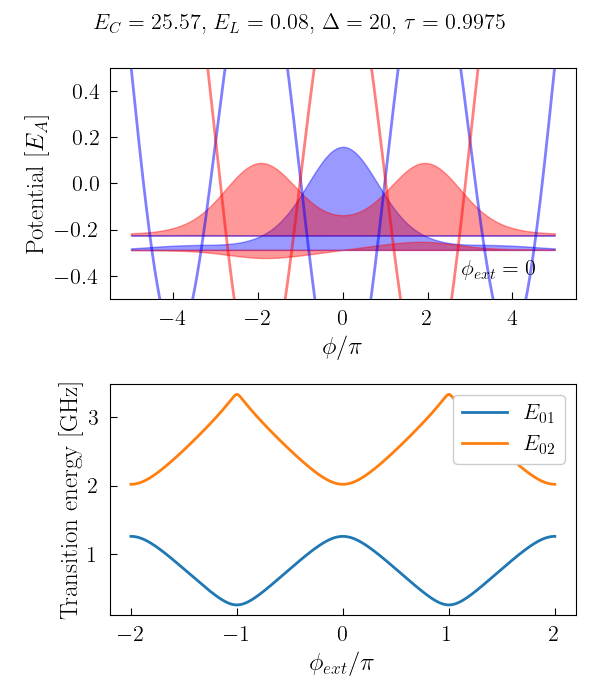

In [413]:
#Values on Si
# Lj = 4.62e-9
# C0 = 54e-18/5
# Cj = 54e-18/0.00185

#Values on membrane
Lj = 4.96e-9
Cj = 24.58e-15
C0 = 20.88e-18

N = 400
Delta = 20; r = 0.05
C_total = C0*N/12 + Cj/N
El = L_to_El(Lj)*1e-9/N
Ec = Ec_to_C(C_total)*1e-9

ham = fb.hamiltonian(Ec, El, Delta, r, 0, dimension = 100)
evals, eigens = ham.eigenstates()
phi_list = np.linspace(-5*np.pi,5*np.pi,1001)
g_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[0],100)
g_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[0],100)
e_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[1],100)
e_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[1],100)
f_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[2],100)
f_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[2],100)

flux_array = np.linspace(-2*np.pi, 2*np.pi, 501)
fixed_params = {'Ec': Ec, 'El': El, 'Delta': Delta, 'r': r}
eigvals = fb.eigen_vs_parameter(parameter_name='phi_ext', parameter_values=flux_array, fixed_params=fixed_params, eigvals=3, plot=False)

x = np.linspace(-5*np.pi,5*np.pi,1001)

y1 = 1/2*El*x**2 - Delta*np.cos((x-0)/2)
y2 = 1/2*El*x**2 + Delta*np.cos((x-0)/2)


fig,ax = plt.subplots(2,1, figsize=(6,7))
fig.suptitle(rf'$E_C = {np.round(Ec,2)}$, $E_L = {np.round(El,2)}$, $\Delta={Delta}$, $\tau={1-r**2}$')
ax[0].plot(x/np.pi,y1/Delta, color='blue', alpha=0.5,linewidth=2)
ax[0].fill_between(phi_list/np.pi,evals[0]/Delta, np.real(g_up) + evals[0]/Delta, color='blue', alpha=0.4)
ax[0].fill_between(phi_list/np.pi,evals[0]/Delta, np.imag(g_down) + evals[0]/Delta, color='red', alpha=0.4)

ax[0].plot(x/np.pi,y2/Delta, color='red', alpha=0.5,linewidth=2)
ax[0].fill_between(phi_list/np.pi,evals[1]/Delta, np.abs(e_down) + evals[1]/Delta, color='red', alpha=0.4)
ax[0].fill_between(phi_list/np.pi,evals[1]/Delta, np.real(e_up) + evals[1]/Delta, color='blue', alpha=0.4)

# ax[0].fill_between(phi_list/np.pi,evals[2]/Delta, np.imag(f_down) + evals[2]/Delta, color='green', alpha=0.4)
# ax[0].fill_between(phi_list/np.pi,evals[2]/Delta, np.real(f_up) + evals[2]/Delta, color='blue', alpha=0.4)

ax[0].set_xlabel(r'$\phi/\pi$')
ax[0].set_ylabel(r'Potential $[E_A]$')
ax[0].set_ylim([-0.5,0.5])
ax[0].text(3.7,-0.4,r'$\phi_{ext}=0$', ha='center')

ax[1].plot(flux_array/np.pi, eigvals[:,1] - eigvals[:,0], label = r'$E_{01}$')
ax[1].plot(flux_array/np.pi, eigvals[:,2] - eigvals[:,0], label = r'$E_{02}$')
ax[1].set_xlabel(r'$\phi_{ext}/\pi$')
ax[1].set_ylabel(r'Transition energy [GHz]')
ax[1].legend(loc='upper right')
# ax[1].set_ylim([0,3.5])
fig.tight_layout()
plt.show()

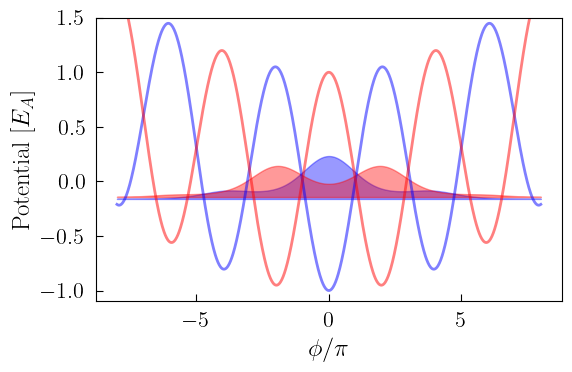

In [ ]:
Ec = 40; El = 0.05; Delta = 20; r = 0.05
ham = fb.hamiltonian(Ec, El, Delta, r, 0, dimension = 100)
evals, eigens = ham.eigenstates()
phi_list = np.linspace(-8*np.pi,8*np.pi,1001)
g_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[0],100)
g_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[0],100)
e_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[1],100)
e_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[1],100)
f_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[2],100)
f_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[2],100)
h_down = wavefunction_phi_fbq_down(Ec,El,phi_list,eigens[3],100)
h_up = wavefunction_phi_fbq_up(Ec,El,phi_list,eigens[3],100)

x = np.linspace(-8*np.pi,8*np.pi,1001)

y1 = 1/2*El*x**2 - Delta*np.cos((x-0)/2)
y2 = 1/2*El*x**2 + Delta*np.cos((x-0)/2)


fig,ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x/np.pi,y1/Delta, color='blue', alpha=0.5,linewidth=2)
ax.fill_between(phi_list/np.pi,evals[0]/Delta, np.abs(g_up) + evals[0]/Delta, color='blue', alpha=0.4)

ax.plot(x/np.pi,y2/Delta, color='red', alpha=0.5,linewidth=2)
ax.fill_between(phi_list/np.pi,evals[1]/Delta, np.abs(e_down) + evals[1]/Delta, color='red', alpha=0.4)

ax.set_xlabel(r'$\phi/\pi$')
ax.set_ylabel(r'Potential $[E_A]$')
ax.set_ylim([-1.1,1.5])
fig.tight_layout()
plt.show()

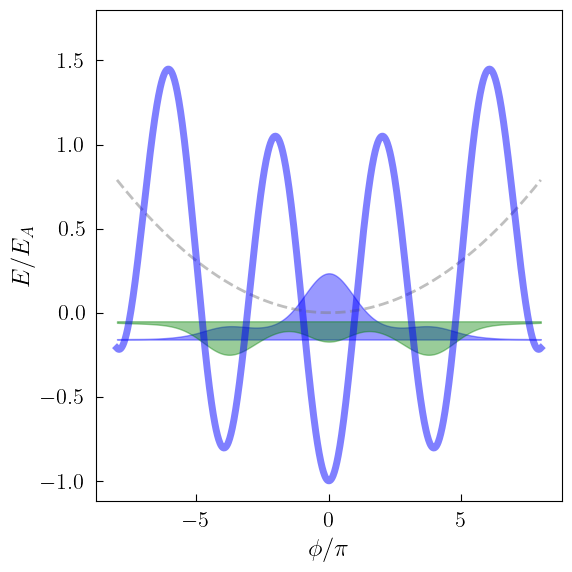

In [ ]:
x = np.linspace(-8*np.pi,8*np.pi,1001)
El = 0.05; Delta = 20
y1 = 1/2*El*x**2 - Delta*np.cos(x/2)
y2 = 1/2*El*x**2 + Delta*np.cos(x/2)

fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(x/np.pi,1/2*El*x**2/Delta, color='gray', linestyle='dashed', alpha=0.5)
ax.plot(x/np.pi,y1/Delta, color='blue', alpha=0.5,linewidth=5)
# ax.plot(x/np.pi,y2/Delta, color='red', alpha=0.5,linewidth=5)

ax.fill_between(phi_list/np.pi,evals[0]/Delta, np.real(g_up) + evals[0]/Delta, color='blue', alpha=0.4)
ax.fill_between(phi_list/np.pi,evals[2]/Delta, 30*np.real(e_up) + evals[2]/Delta, color='green', alpha=0.4)
# ax.fill_between(phi_list/np.pi,evals[1]/Delta, np.real(excited) + evals[1]/Delta, color='red', alpha=0.4)

ax.set_xlabel(r'$\phi/\pi$')
ax.set_ylabel(r'$E/E_A$')
ax.set_ylim(top=1.8)
fig.tight_layout()
plt.show()

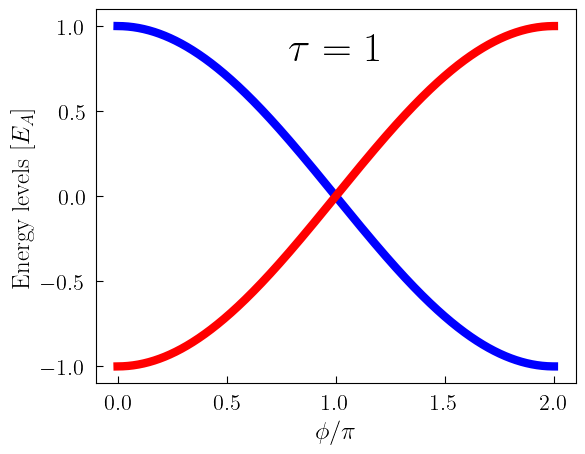

In [169]:
fig,ax = plt.subplots(1,1)
x = np.linspace(0,2*np.pi,1001)
ax.plot(x/np.pi,np.cos(x/2), color='blue',linewidth=6)
ax.plot(x/np.pi,-np.cos(x/2), color='red',linewidth=6)
ax.text(1,0.8,r'$\tau =1$',ha='center', fontsize=30)
ax.set_xlabel(r'$\phi/\pi$')
ax.set_ylabel(r'Energy levels $[E_A]$')
plt.show()

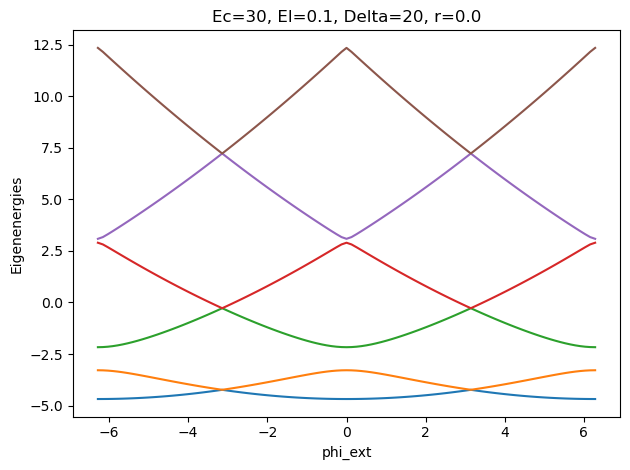

In [59]:
flux_array = np.linspace(-2*np.pi,2*np.pi,101)
fixed_params = {
    'Ec': 30,
    'El': 0.1,
    'Delta': 20,
    'r': 0.0
}
eigenenergies = fb.eigen_vs_parameter(parameter_name='phi_ext',parameter_values=flux_array,fixed_params=fixed_params)

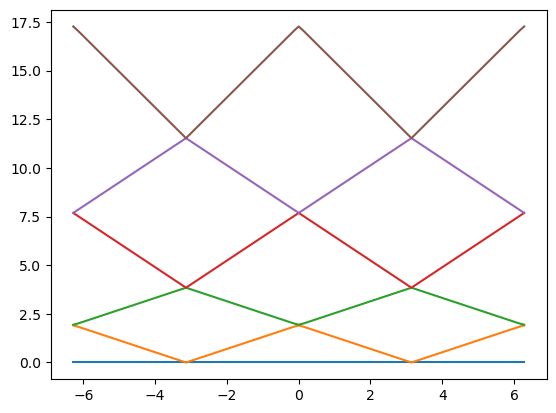

In [57]:
fig,ax = plt.subplots(1,1)
ax.plot(flux_array, eigenenergies - eigenenergies[:,0].reshape(-1,1))
plt.show()

# JJA

In [251]:
from matplotlib.ticker import MaxNLocator
N = 250
def resonance_model(j, fp, cg_over_cj):
    return fp * np.sqrt((1-np.cos(j*np.pi/N))/(1-np.cos(j*np.pi/N) + cg_over_cj/2))

x = np.linspace(1,15,101)
fp = 1; cg_over_cj = 0.001
k_index_interpol = np.linspace(0,15,100)
k_index = np.arange(1,15+1,1)
freqs = resonance_model(k_index, fp, cg_over_cj)
freqs_interpol = resonance_model(k_index_interpol, fp, cg_over_cj)

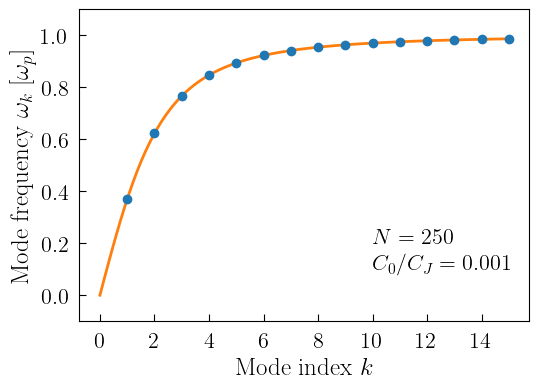

In [254]:
fig,ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(k_index_interpol, freqs_interpol, color='C1')
# ax.plot(k_index_interpol, k_index_interpol*fp*np.pi/N*np.sqrt(1/cg_over_cj), color='gray')
ax.plot(k_index, freqs, 'o', color='C0')
ax.set_ylim(bottom=-0.1, top=1.1)
ax.set_xlabel(r'Mode index $k$')
ax.set_ylabel(r'Mode frequency $\omega_k$ [$\omega_p$]')
ax.text(10,0.1,r'$C_0/C_J = 0.001$')
ax.text(10,0.2,r'$N=250$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [295]:
filepath = "/Users/joancaceres/Downloads/FB_W7_S2_RF1_20231212_212902.hdf5"
filepath2 = "/Users/joancaceres/Downloads/FB_W7_S2_RF1_20231213_102258.hdf5"
import h5py
data = h5py.File(filepath,'r')
data2 = h5py.File(filepath2,'r')
data.keys()

<KeysViewHDF5 ['f1_frequency_array', 'f1_power_array', 'magnitude_array', 'phase_array', 'phase_unwrapped_array']>

In [266]:
f1_frequency_array = np.array(data['f1_frequency_array'])
f1_power_array = np.array(data['f1_power_array'])
magnitude_array = np.array(data['magnitude_array'])


In [315]:
magnitude_array.shape

(11, 4001)

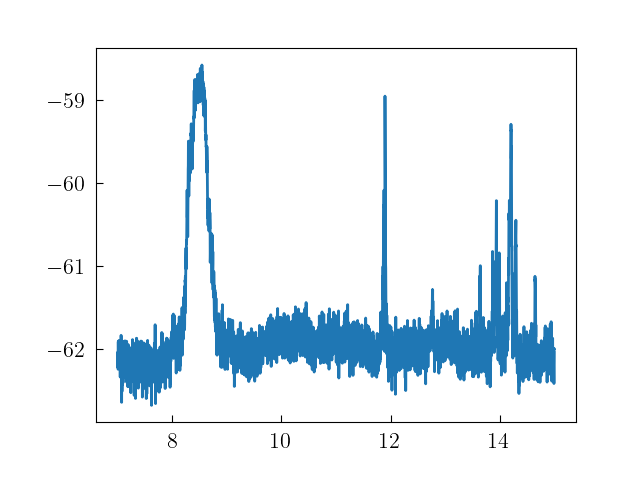

In [316]:
fig,ax = plt.subplots(1,1)
ax.plot(f1_frequency_array, magnitude_array[5])
plt.show()

In [325]:
from scipy.optimize import curve_fit

def resonance_model(j, fp, cg_over_cj):
    cg_over_cj *= 1/1000
    N = 150
    return fp * np.sqrt((1-np.cos(j*np.pi/N))/(1-np.cos(j*np.pi/N) + cg_over_cj/2))

In [354]:
fit

array([14.40003583,  0.82815018])

In [360]:
Lj = 4.13e-9*1.2
Cj = 1/(Lj*(2*np.pi*fit[0]*1e9)**2)
C0 = Cj*fit[1]/1e3
print('Cj: ',Cj, 'C0: ', C0)

Cj:  2.4648007649735168e-14 C0:  2.041225203306761e-17


In [430]:
Ec_to_C(6.24e9)

3.1042034174133208e-15

In [361]:
print(Lj/C0)

242795356.0426031


In [362]:
Lj_prev = 4.62e-9
C0_prev = 54e-18
Cj_prev = 54e-18/0.00185

Lj_prev/C0_prev

85555555.55555555

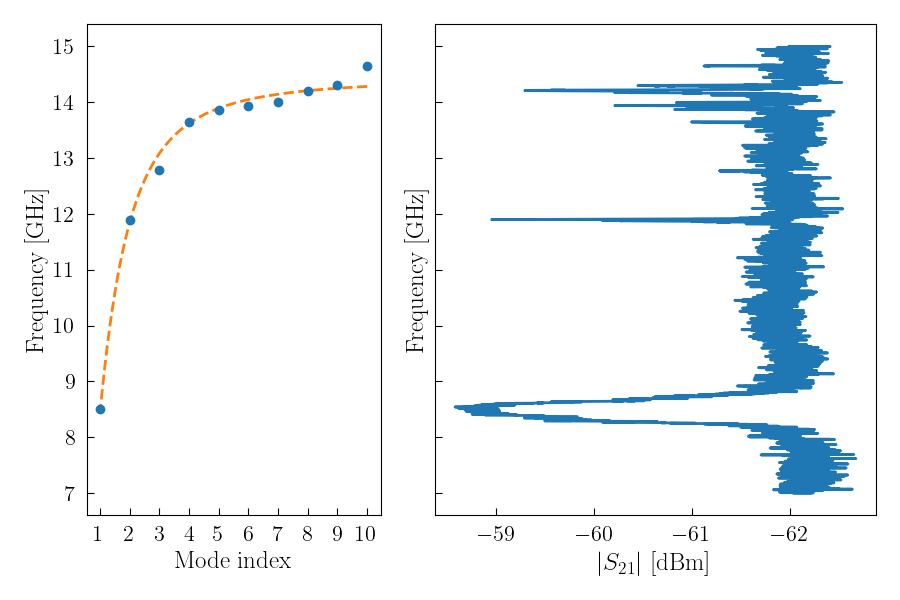

In [407]:
%matplotlib widget
fig,ax = plt.subplots(1,2, figsize = (9,6), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

reso = np.array([8.498, 11.899, 12.789, 13.64, 13.865, 13.94, 14, 14.2072, 14.3, 14.647])
x = np.arange(1,len(reso)+1,1)
x_interpol = np.linspace(x.min(), x.max(),1000)
fit,cov = curve_fit(resonance_model, x, reso, p0=[14,1/5])

ax[0].plot(x_interpol,resonance_model(x_interpol,*fit), color='C1', linestyle='dashed')
ax[0].plot(x,reso, 'o', color='C0')
ax[0].set_xlabel('Mode index')
ax[0].set_ylabel('Frequency [GHz]')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))


# freq, mag = np.meshgrid(f1_frequency_array, f1_power_array)
# c = ax[1].pcolormesh(mag,freq,magnitude_array, shading='auto')
# fig.colorbar(c, ax=ax[1], label=r'$|S_{21}|$')
# ax[1].set_xlabel('Power [dBm]')
# ax[1].set_ylabel('Frequency [GHz]')
# ax[1].axvline(x=5, color='gray', linestyle='dashed')

ax[1].plot(magnitude_array[5,:], f1_frequency_array)
ax[1].set_xlabel(r'$|S_{21}|$ [dBm]')
ax[1].set_ylabel('Frequency [GHz]')
ax[1].invert_xaxis()
# for y in reso:
#     ax[1].axhline(y=y, color='gray', alpha=0.4, linestyle='dashed')
fig.tight_layout()
plt.show()

In [411]:
Lj = 4.13e-9*1.2
Cj = 1/(Lj*(2*np.pi*fit[0]*1e9)**2)
C0 = Cj*fit[1]/1e3
print('Lj: ', Lj, 'Cj: ',Cj, 'C0: ', C0)

Lj:  4.955999999999999e-09 Cj:  2.4580580367034062e-14 C0:  2.08815924150052e-17


In [380]:
Lj = 4.96e-9
Cj = 24.58e-15
C0 = 20.88e-18

0.1324191042019789

In [381]:
np.sqrt(cov[1,1])

0.08674780175774581

In [ ]:
data = h5py.File(filepath,'r')
data.keys()

# Fluxonium

In [424]:
N = 17
print(L_to_El(3.21e-9 * N)*1e-9)
# Ctot = 29.52e-15/N + 57.99e-18* ((72+88)/72)*N/12 + 29.52e-15*0.1/0.57
Ctot = 29.52e-15/N + 57.99e-18*N/12 + 2.1723e-15
print(C_to_Ec(Ctot)*1e-9)

2.995446450554906
4.853571190524809


In [ ]:
N = 139
print(L_to_El(3.21e-9 * N)*1e-9)
Ctot = 29.52e-15/N + 57.99e-18* ((72+88)/72)*N/12 + 29.52e-15*0.1/0.57
print(C_to_Ec(Ctot)*1e-9)

0.36634956589520434
2.813793329859048


In [422]:
print(L_to_El(3.21e-9 * 0.57/0.1)*1e-9)

8.933787659549722


In [3]:
filedirectory = "//Users//joancaceres//Documents//FERBO//FB_W10_S4//run2//FBW10S4_"
from src.utilities import *
import h5py
import yaml

In [5]:
data_dict = load_data(filedirectory + str(515756))
data_dict.keys()

dict_keys(['parameters', 'flux', 'I', 'Q', 'amp', 'freq', 'phase'])

In [8]:
data_dict['flux']

array([-1.164 , -1.1638, -1.1636, -1.1634, -1.1632, -1.163 , -1.1628,
       -1.1626, -1.1624, -1.1622, -1.162 , -1.1618, -1.1616, -1.1614,
       -1.1612, -1.161 , -1.1608, -1.1606, -1.1604, -1.1602, -1.16  ,
       -1.1598, -1.1596, -1.1594, -1.1592, -1.159 , -1.1588, -1.1586,
       -1.1584, -1.1582, -1.158 , -1.1578, -1.1576, -1.1574, -1.1572,
       -1.157 , -1.1568, -1.1566, -1.1564, -1.1562, -1.156 ])

In [12]:
data_dict = load_data(filedirectory + str(515884))
data_dict.keys()

dict_keys(['parameters', 'T1', 'T1_error', 'flux_detuning', 'flux_zero', 'time', 'I', 'Q', 'amp', 'delay_ns', 'phase', 'phase_fit'])

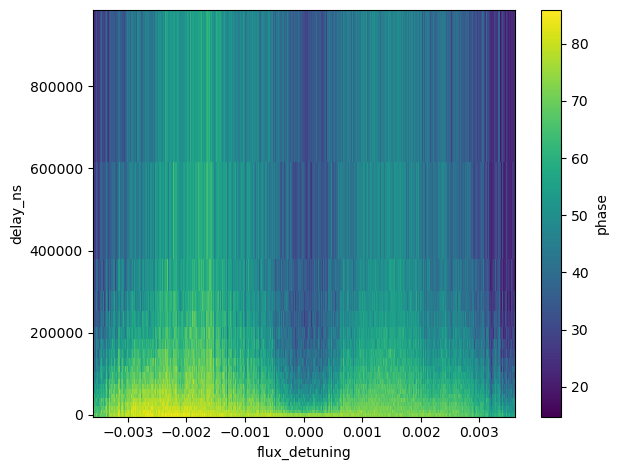

In [13]:
data_dict = load_data(filedirectory + str(515884))
fig,ax = plt.subplots(1,1)
plot3D(
    data_dict=data_dict,
    x_key='flux_detuning',
    y_key='delay_ns',
    z_key='phase',
    flatten_vertical=0,
    fig = fig,
    ax = ax
)
plt.show()

In [55]:
data_dict = load_data(filedirectory + str(515884))

data_dict['parameters']

{'calibrate': 0,
 'delay_log': True,
 'delay_log_estimated_T1': 150000,
 'delay_log_npoints': 20,
 'delay_start': 4,
 'delay_step': 50000,
 'delay_stop': 800000,
 'flux_center': -1.1607,
 'flux_source': 'gv.bilt2',
 'flux_span': 0.0072,
 'flux_step': 5e-06,
 'flux_track_center': -1.1607,
 'flux_track_freq': 6884700000.0,
 'flux_track_span': 0.005,
 'flux_track_step': 0.0002,
 'n_avg': 800,
 'qubit_frequency': 6884700000.0,
 'qubit_gain': 19,
 'readout_len': 30000,
 'resonator_amp': 0.2,
 'resonator_frequency': 6138782000.0,
 'resonator_gain': -2,
 'square_pi_amp': 0.2,
 'square_pi_len': 92,
 'timestamp': '2024-07-05 19:36:34',
 'track_flux': 1,
 'wait_time': 500000}

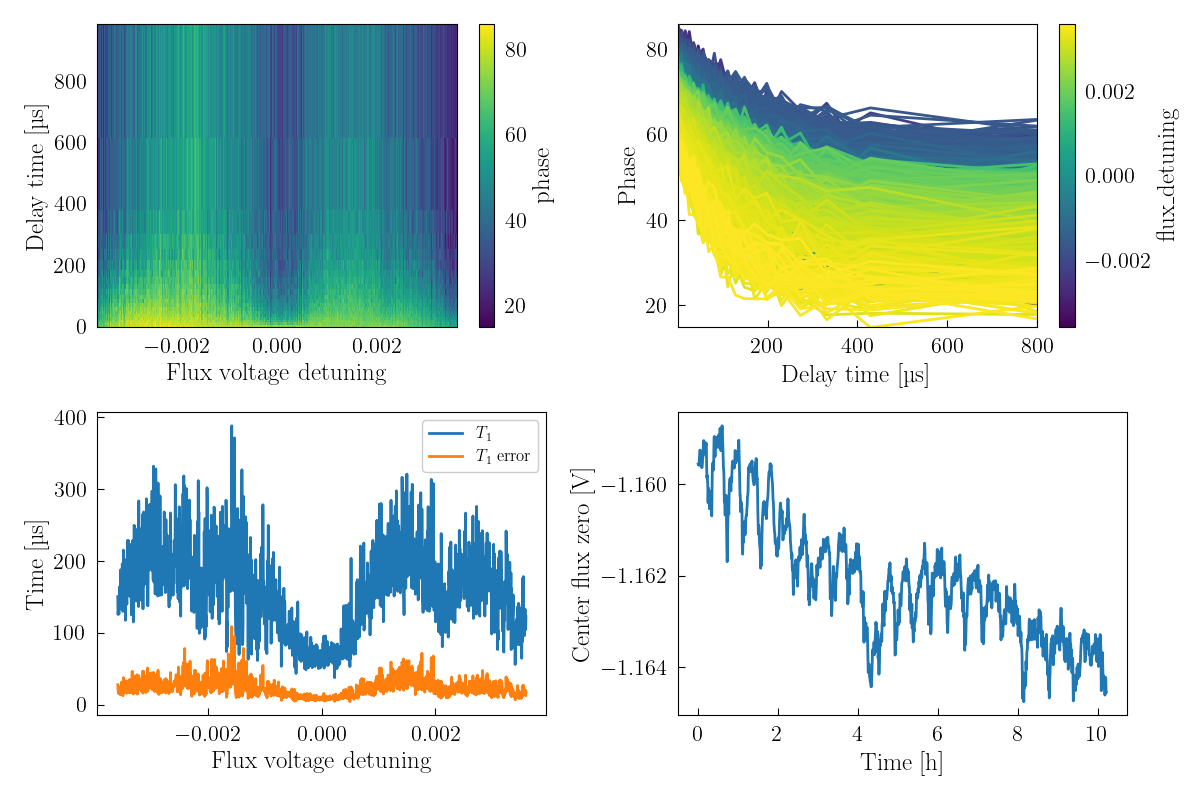

In [56]:
from matplotlib.ticker import ScalarFormatter

latex_style(1)
fig,ax = plt.subplots(2,2,figsize=(12,8))

data_dict['delay_us'] = data_dict['delay_ns']*1e-3
plot3D(
    data_dict=data_dict,
    x_key='flux_detuning',
    y_key='delay_us',
    z_key='phase',
    flatten_vertical=0,
    fig = fig,
    ax = ax[0,0]
)

plot2D(
    data_dict=data_dict,
    x_key='delay_us',
    y_key='phase',
    color_key='flux_detuning',
    fig=fig,
    ax=ax[0,1]
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))


ax[1,0].plot(data_dict['flux_detuning'], data_dict['T1']*1e-3, label=r'$T_1$')
ax[1,0].plot(data_dict['flux_detuning'], data_dict['T1_error']*1e-3, label=r'$T_1$ error')

ax[1,1].plot(data_dict['time']/60/60, data_dict['flux_zero'])

ax[0,0].set_xlabel('Flux voltage detuning')
ax[0,0].set_ylabel('Delay time [µs]')

ax[1,0].legend(fontsize=12)
ax[1,0].set_xlabel('Flux voltage detuning')
ax[1,0].set_ylabel('Time [µs]')

ax[0,1].set_xlabel('Delay time [µs]')
ax[0,1].set_ylabel('Phase')

ax[1,1].set_xlabel('Time [h]')
ax[1,1].set_ylabel('Center flux zero [V]')


fig.tight_layout()
plt.show()


In [62]:
1/(22/10/60)

27.272727272727273

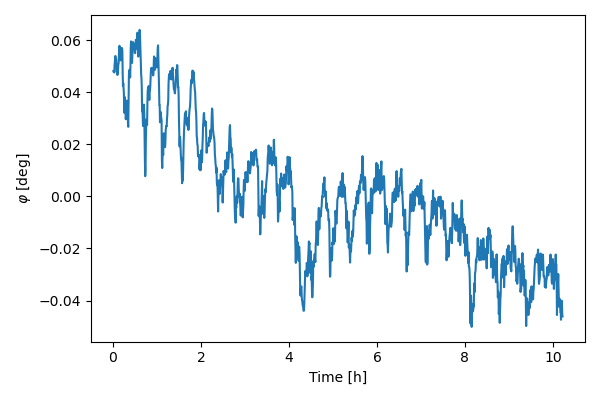

In [71]:
latex_style(0)
%matplotlib widget
fig,ax = plt.subplots(1,1, figsize=(6,4))
x = data_dict['time']/60/60
y = ((data_dict['flux_zero'] - np.mean(data_dict['flux_zero']))/3.033) * 180/np.pi
ax.plot(x, y)
# ax.plot(data_dict['flux_detuning'], np.abs(data_dict['flux_zero']),'o-',markersize=2)
ax.set_xlabel('Time [h]')
ax.set_ylabel(r'$\varphi$ [deg]')
fig.tight_layout()
plt.show()

In [442]:
p['I'].shape

(50, 125)

In [564]:
def filter_lines(yaml_str):
    filtered_lines = []
    for line in yaml_str.split('\n'):
        if '!!python/' not in line:
            filtered_lines.append(line)
    return '\n'.join(filtered_lines)

with h5py.File(filedirectory+str(503624)+'.hdf', 'r') as f:
    parameters = yaml.safe_load(filter_lines(f.attrs['parameters']))
    meta = yaml.safe_load(filter_lines(f.attrs['meta']))
    subgroups_sorted = sorted(f['children'].keys(), key=lambda x: int(x))
    for i, group in enumerate(subgroups_sorted):
        if i == 0:
            meta_child = yaml.safe_load(filter_lines(f['children'][group].attrs['meta']))
            meta_child['fieldMap']
        # print(f['children'][group]['table'])
        
        
            # print(f['children'][group].attrs['meta'])
    # print(f['children']['0'].keys())
    # print(list(f['children']['0'].keys()))
    # print(f['children']['0'].attrs.keys())
    # print(f['children']['0'].attrs['meta'])
    # meta = yaml.safe_load(f.attrs['meta'])

In [567]:
meta_child

{'creationTime': 1719394874.152016,
 'defaults': {},
 'description': '',
 'fieldMap': {'I': 3, 'Q': 4, 'amp': 1, 'freq': 0, 'phase': 2},
 'fieldNames': ['freq', 'amp', 'phase', 'I', 'Q'],
 'filename': None,
 'index': 0,
 'length': 61,
 'modificationTime': 1719394875.6418972,
 'name': 'FBW10S4_503624',
 'tags': ''}

In [722]:
file_path = "/Users/joancaceres/Documents/FERBO/FB_W10_S4/run2/FBW10S4_515482.hdf"
with h5py.File(file_path, 'r') as f:
    print(f.attrs['meta'])
    # print(f.attrs['parameters'])
    r = f['table']
    print(r[:])

creationTime: 1720102128.6955903
dataType: !!python/name:numpy.float64 ''
defaults: {}
description: ''
fieldMap:
  T1: 1
  T1_error: 2
  flux_detuning: 0
  time: 3
fieldNames:
- flux_detuning
- T1
- T1_error
- time
filename: null
index: 12
length: 12
modificationTime: 1720102431.9973218
name: FBW10S4_515483
tags: T1_vs_flux

[[-3.00000000e-03  1.85737562e+05  3.86272400e+04  2.48902085e+01]
 [-2.50000000e-03  1.83336979e+05  3.30487073e+04  4.92192841e+01]
 [-2.00000000e-03  2.28424548e+05  3.96106451e+04  7.51780336e+01]
 [-1.50000000e-03  1.85021747e+05  3.94156928e+04  9.99661908e+01]
 [-1.00000000e-03  1.16046597e+05  1.96544323e+04  1.25972810e+02]
 [-5.00000000e-04  9.96213076e+04  1.57104150e+04  1.51646963e+02]
 [ 0.00000000e+00  8.55528334e+04  1.13794641e+04  1.76044769e+02]
 [ 5.00000000e-04  1.05846152e+05  1.35764527e+04  2.00487778e+02]
 [ 1.00000000e-03  1.77875205e+05  2.83956675e+04  2.26210458e+02]
 [ 1.50000000e-03  2.19105923e+05  5.05144356e+04  2.51544155e+02]
 [ 

In [720]:
r[:]

RuntimeError: Unable to synchronously get dataspace (invalid dataset identifier)

In [723]:
def load_hdf5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        # Carga los parámetros y meta atributos
        parameters = yaml.safe_load(filter_lines(f.attrs['parameters']))
        meta = yaml.safe_load(filter_lines(f.attrs['meta']))
        
        # Ordena los nombres de los subgrupos numéricamente``
        subgroups_sorted = sorted(f['children'].keys(), key=lambda x: int(x))
        all_data = []
        for idx, group in enumerate(subgroups_sorted):
            table = f['children'][group]['table']
            if idx == 0:
                # Obtiene el meta atributo del primer subgrupo para el fieldMap
                meta_child = yaml.safe_load(filter_lines(f['children'][group].attrs['meta']))
                field_map = meta_child['fieldMap']
                # Inicializa el diccionario de datos con los parámetros
                data_dict = {'parameters': parameters}
                # Inicializa las listas para cada campo del fieldMap
                for field in field_map:
                    data_dict[field] = []
                    
            # Extrae los datos del dataset y los agrega a las listas correspondientes
            for field, index in field_map.items():
                if len(data_dict[field]) == 0:
                    # Inicializa la lista de listas si es la primera vez
                    data_dict[field] = [[] for _ in range(table.shape[0])]
                # Agrega los datos a la estructura correcta
                for row_idx in range(table.shape[0]):
                    data_dict[field][row_idx].append(table[row_idx, index])
        
        # Convertir las listas a arrays numpy y asegurarse de que la forma sea correcta
        for field in field_map:
            data_dict[field] = np.array(data_dict[field])
            
    return data_dict

In [735]:
def load_hdf5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        # Carga los parámetros y meta atributos
        parameters = yaml.safe_load(filter_lines(f.attrs['parameters']))
        meta = yaml.safe_load(filter_lines(f.attrs['meta']))
        
        # Extrae el fieldMap del meta principal
        main_field_map = meta.get('fieldMap', {})
        
        # Inicializa el diccionario de datos con los parámetros
        data_dict = {'parameters': parameters}
        
        # Si existe un table en el grupo principal, procesarlo
        if 'table' in f:
            main_table = f['table']
            for field, index in main_field_map.items():
                data_dict[field] = []
                for row_idx in range(main_table.shape[0]):
                    data_dict[field].append(main_table[row_idx, index])
        
        # Ordena los nombres de los subgrupos numéricamente
        subgroups_sorted = sorted(f['children'].keys(), key=lambda x: int(x))
        for idx, group in enumerate(subgroups_sorted):
            table = f['children'][group]['table']
            if idx == 0:
                # Obtiene el meta atributo del primer subgrupo para el fieldMap del subgrupo
                meta_child = yaml.safe_load(filter_lines(f['children'][group].attrs['meta']))
                child_field_map = meta_child['fieldMap']
                
                # Inicializa las listas para cada campo del fieldMap del subgrupo
                for field in child_field_map:
                    if field not in data_dict:
                        data_dict[field] = []
                    
            # Extrae los datos del dataset y los agrega a las listas correspondientes
            for field, index in child_field_map.items():
                if len(data_dict[field]) == 0:
                    # Inicializa la lista de listas si es la primera vez
                    data_dict[field] = [[] for _ in range(table.shape[0])]
                # Agrega los datos a la estructura correcta
                for row_idx in range(table.shape[0]):
                    data_dict[field][row_idx].append(table[row_idx, index])
        
        # Convertir las listas a arrays numpy y asegurarse de que la forma sea correcta
        for field in data_dict:
            if field != 'parameters':
                data_dict[field] = np.array(data_dict[field])
            
    return data_dict

In [855]:
with h5py.File(filedirectory+str(515507)+'.hdf') as f:
    # print(f.attrs.keys())
    print(f.attrs['meta'])

creationTime: 1720103934.915898
dataType: !!python/name:numpy.float64 ''
defaults: {}
description: ''
fieldMap:
  T1: 1
  T1_error: 2
  flux_detuning: 0
  time: 3
fieldNames:
- flux_detuning
- T1
- T1_error
- time
filename: null
index: 24
length: 24
modificationTime: 1720104694.227817
name: FBW10S4_515508
tags: T1_vs_flux



In [856]:
data_dict = load_hdf5_data(filedirectory+str(515507)+'.hdf')
data_dict.keys()

dict_keys(['parameters', 'T1', 'T1_error', 'flux_detuning', 'time', 'I', 'Q', 'amp', 'phase', 'phase_fit', 'pulse_length_ns'])

In [863]:
data_dict['pulse_length_ns'].shape

(24, 40)

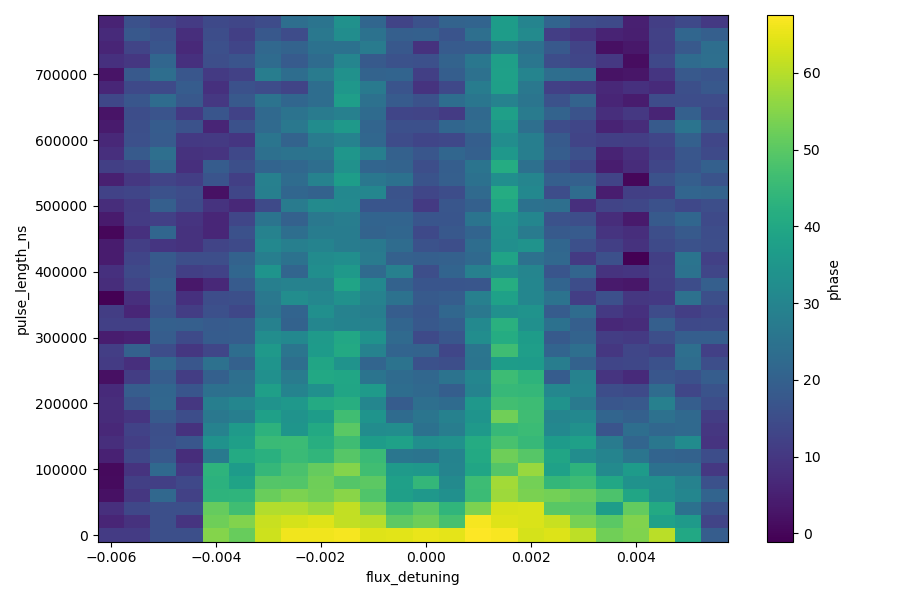

In [860]:
latex_style(0)
plot3D(
    data_dict=data_dict,
    x_key='flux_detuning',
    y_key='pulse_length_ns',
    z_key='phase',
    flatten_vertical=0,
    figsize=(9,6)
)

plt.show()

In [754]:
def load_hdf5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        # Carga los parámetros y meta atributos
        parameters = yaml.safe_load(filter_lines(f.attrs['parameters']))
        meta = yaml.safe_load(filter_lines(f.attrs['meta']))
        
        # Extrae el fieldMap del meta principal
        main_field_map = meta.get('fieldMap', {})
        
        # Inicializa el diccionario de datos con los parámetros
        data_dict = {'parameters': parameters}
        
        # Si existe un table en el grupo principal, procesarlo
        if 'table' in f:
            main_table = f['table']
            for field, index in main_field_map.items():
                data_dict[field] = []
                for row_idx in range(main_table.shape[0]):
                    data_dict[field].append(main_table[row_idx, index])
        
        # Ordena los nombres de los subgrupos numéricamente
        subgroups_sorted = sorted(f['children'].keys(), key=lambda x: int(x))
        for idx, group in enumerate(subgroups_sorted):
            table = f['children'][group]['table']
            if idx == 0:
                # Obtiene el meta atributo del primer subgrupo para el fieldMap del subgrupo
                meta_child = yaml.safe_load(filter_lines(f['children'][group].attrs['meta']))
                child_field_map = meta_child['fieldMap']
                
                # Inicializa las listas para cada campo del fieldMap del subgrupo
                for field in child_field_map:
                    if field not in data_dict:
                        data_dict[field] = [[] for _ in range(table.shape[0])]
                    
            # Extrae los datos del dataset y los agrega a las listas correspondientes
            for field, index in child_field_map.items():
                # Agrega los datos a la estructura correcta
                for row_idx in range(table.shape[0]):
                    data_dict[field][row_idx].append(table[row_idx, index])
        
        # Convertir las listas a arrays numpy y asegurarse de que la forma sea correcta
        for field in data_dict:
            if field != 'parameters':
                data_dict[field] = np.array(data_dict[field]).T
            
    return data_dict

In [851]:
data_dict = load_hdf5_data(filedirectory+str(515524)+'.hdf')
data_dict.keys()

OSError: Unable to synchronously open file (bad object header version number)

In [836]:
data_dict['phase'].shape

(43, 40)

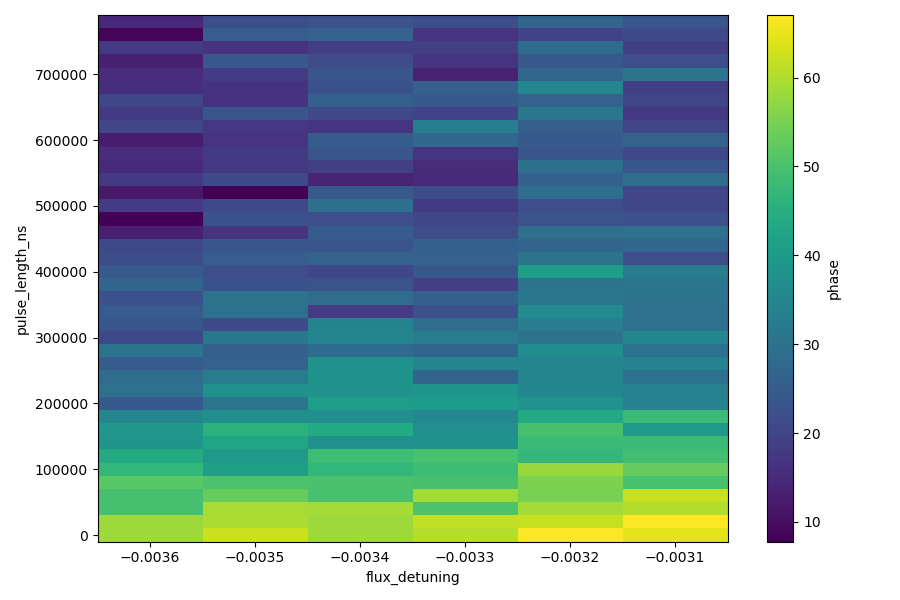

In [848]:
latex_style(0)
plot3D(
    data_dict=data_dict,
    x_key='flux_detuning',
    y_key='pulse_length_ns',
    z_key='phase',
    flatten_vertical=0,
    figsize=(9,6)
)

plt.show()

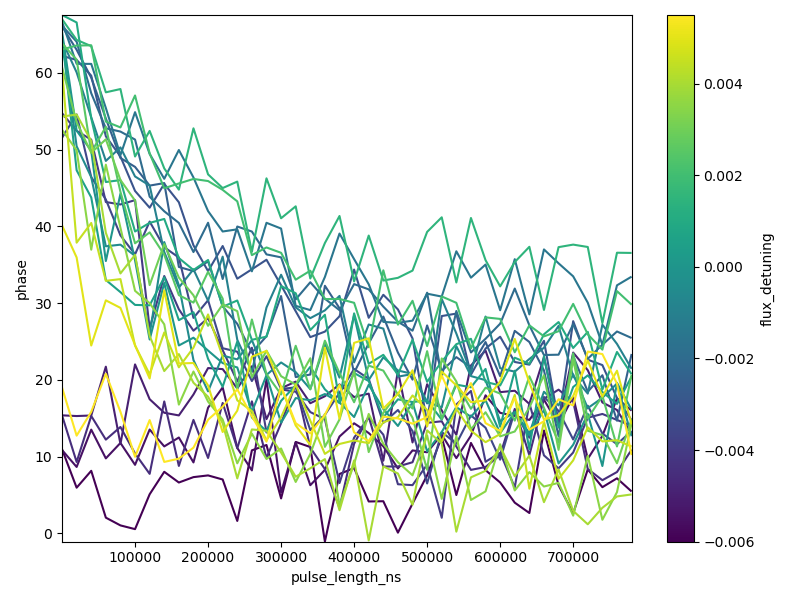

In [771]:
latex_style(0)
plot2D(
    data_dict=data_dict,
    x_key='pulse_length_ns',
    y_key='phase',
    color_key='flux_detuning',
)
plt.show()

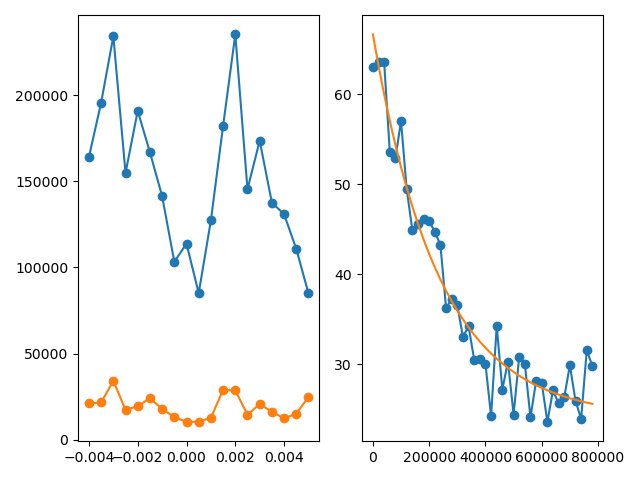

In [787]:
fig,ax = plt.subplots(1,2)
idx = 16
ax[0].plot(data_dict['flux_detuning'][4:-1], data_dict['T1'][4:-1], 'o-')
ax[0].plot(data_dict['flux_detuning'][4:-1], data_dict['T1_error'][4:-1], 'o-')
ax[1].plot(data_dict['pulse_length_ns'][idx], data_dict['phase'][idx], 'o-')
ax[1].plot(data_dict['pulse_length_ns'][idx], data_dict['phase_fit'][idx], '-')
fig.tight_layout()
plt.show()

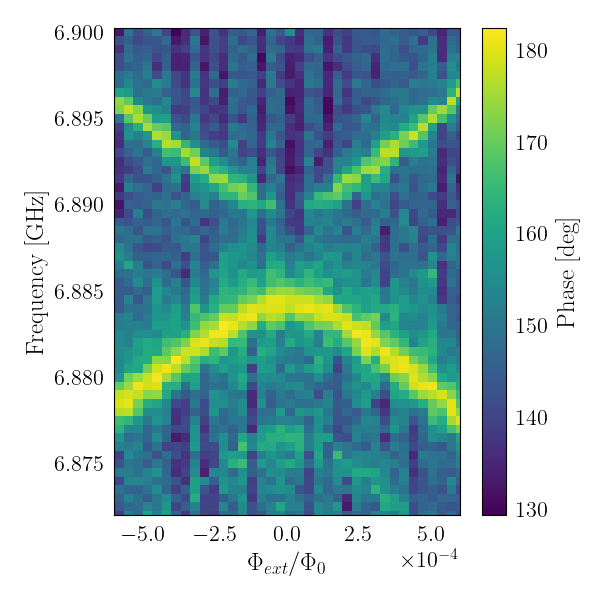

In [646]:
data_dict = load_hdf5_data(filedirectory+str(503624)+'.hdf')

freq = np.arange(6.87e9,6.90e9+0.5e6,0.5e6)*1e-9
flux = (np.arange(1.356,1.356+0.0001*46,0.0001) - 1.35777)/3.033
flux_mesh, freq_mesh = np.meshgrid(flux,freq)

import matplotlib.ticker as ticker
fig,ax = plt.subplots(1,1, figsize=(6,6))
x = np.arange(1,35+1,1)
# ax.pcolormesh(x,)
# ax.imshow(data_dict['phase'].T, aspect='auto', origin='lower')
mesh = ax.pcolormesh(flux_mesh, freq_mesh, data_dict['phase'], shading='auto')
cbar = fig.colorbar(mesh, ax=ax, label='Phase [deg]')
ax.set_xlabel(r'$\Phi_{ext}/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
ax.set_xlim([-0.0006,0.0006])
ax.set_ylim(bottom=6.872)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()
plt.show()

In [696]:
data_dict = load_hdf5_data(filedirectory+str(504256)+'.hdf')

In [690]:
data_dict['amp'].shape

(250, 321)

In [682]:
delay_array = np.arange(- 8000000/2,800000/2,25000)
delay_array.shape

(176,)

In [683]:
176*2

352

In [686]:
data_dict['delay_ns'].shape

(250, 321)

In [665]:
data_dict['delay_ns'][:,0]

array([4.000e+00, 4.400e+01, 8.400e+01, 1.240e+02, 1.640e+02, 2.040e+02,
       2.440e+02, 2.840e+02, 3.240e+02, 3.640e+02, 4.040e+02, 4.440e+02,
       4.840e+02, 5.240e+02, 5.640e+02, 6.040e+02, 6.440e+02, 6.840e+02,
       7.240e+02, 7.640e+02, 8.040e+02, 8.440e+02, 8.840e+02, 9.240e+02,
       9.640e+02, 1.004e+03, 1.044e+03, 1.084e+03, 1.124e+03, 1.164e+03,
       1.204e+03, 1.244e+03, 1.284e+03, 1.324e+03, 1.364e+03, 1.404e+03,
       1.444e+03, 1.484e+03, 1.524e+03, 1.564e+03, 1.604e+03, 1.644e+03,
       1.684e+03, 1.724e+03, 1.764e+03, 1.804e+03, 1.844e+03, 1.884e+03,
       1.924e+03, 1.964e+03, 2.004e+03, 2.044e+03, 2.084e+03, 2.124e+03,
       2.164e+03, 2.204e+03, 2.244e+03, 2.284e+03, 2.324e+03, 2.364e+03,
       2.404e+03, 2.444e+03, 2.484e+03, 2.524e+03, 2.564e+03, 2.604e+03,
       2.644e+03, 2.684e+03, 2.724e+03, 2.764e+03, 2.804e+03, 2.844e+03,
       2.884e+03, 2.924e+03, 2.964e+03, 3.004e+03, 3.044e+03, 3.084e+03,
       3.124e+03, 3.164e+03, 3.204e+03, 3.244e+03, 

In [701]:
data_dict['delay_ns'].shape

(250, 321)

In [703]:
detuning_array = np.linspace(-4,4,321)
detuning_mesh = np.tile(detuning_array,(250,1))
detuning_mesh.shape

(250, 321)

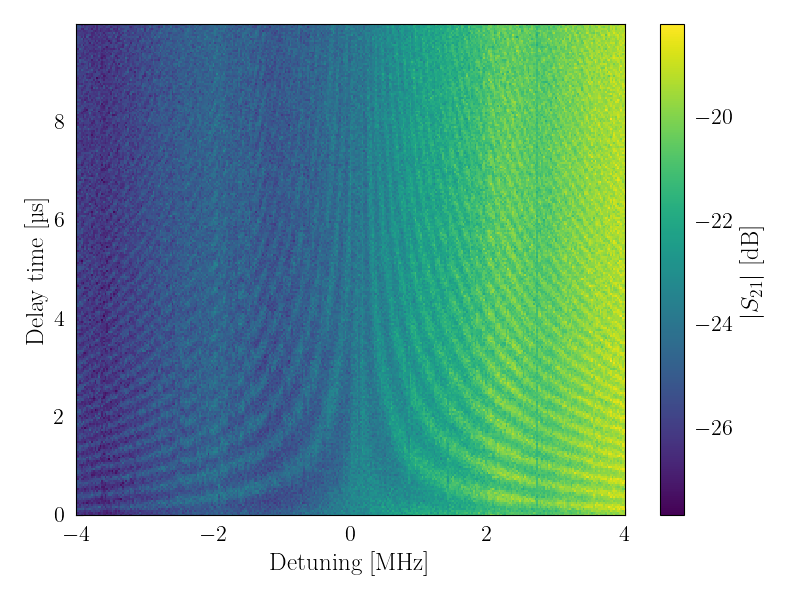

In [705]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
detuning_array = np.linspace(-4,4,321)
detuning_mesh = np.tile(detuning_array,(250,1))

mesh = ax.pcolormesh(detuning_mesh, data_dict['delay_ns']*1e-3, data_dict['amp'], shading='auto')
cbar = fig.colorbar(mesh, ax=ax, label=r'$|S_{21}|$ [dB]')
ax.set_ylabel(r'Delay time [µs]')
ax.set_xlabel(r'Detuning [MHz]')
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()
plt.show()

In [72]:
data = load_data(filedirectory+str(514131))

In [74]:
data.keys()

dict_keys(['flux', 'freq', 'amp', 'phase', 'I', 'Q'])